In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rpsavgperf import rpsavgperf
from scipy.signal import savgol_filter
import kk_abock

In [9]:
shotnr = 35874
tBegin = 3.16
tEnd = 3.47
tcentral = (tBegin+tEnd)/2.0
dtime = (tEnd-tBegin)/2.0
sh1 = rpsavgperf(shotnr, time=tcentral,dt=dtime, side=1)

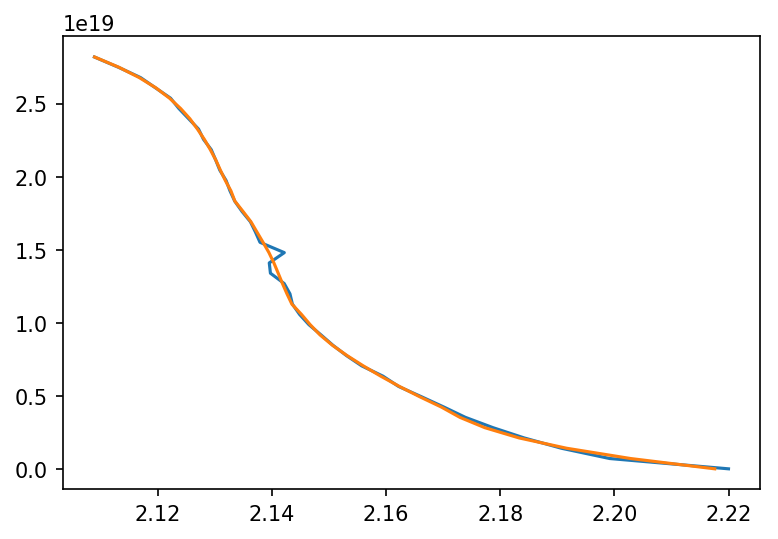

In [10]:
plt.figure(dpi=150)

msk = ~np.isnan(sh1.r)
shr = sh1.r[msk]
shn = sh1.n[msk]
shdr = sh1.dr[msk]

plt.plot(shr, shn)
savshr = savgol_filter(shr, 11, 3)
plt.plot(savshr, shn)
#plt.fill_betweenx(shn, savshr-sh1.dr, savshr+sh1.dr, alpha=0.3)

In [11]:
eq = kk_abock.kk()
eq.Open(shotnr, diag='EQH')
zl = 0.14
rhol = eq.Rz_to_rhopol(tcentral, savshr, np.ones_like(savshr)*zl)
rhol_up = eq.Rz_to_rhopol(tcentral, savshr+shdr, np.ones_like(savshr)*zl)
rhol_dn = eq.Rz_to_rhopol(tcentral, savshr-shdr, np.ones_like(savshr)*zl)
eq.Close()

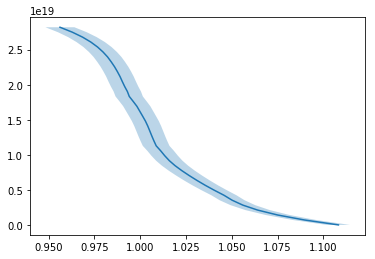

In [12]:
plt.plot(rhol, shn)
plt.fill_betweenx(shn, rhol_dn, rhol_up, alpha=0.3)

In [14]:
fname = './Files/Ref_O.' + str(shotnr)
np.savetxt(fname, np.c_[rhol, shn, rhol_dn, rhol_up], delimiter=',')